In [1]:
#import libraries
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np

In [3]:
df=pd.read_csv("FamousNewsChannel/EY_NewsChannel.csv")

In [4]:
#For no of mentions by famous news channels
famous=df.groupby("UserName").count()
famous["Channel"]=famous.index
famous=famous[["Text","Channel"]]
famous.rename({"Text":"noOfMention"},axis=1,inplace=True)
famous=famous.sort_values(by=['noOfMention'],ascending=False)

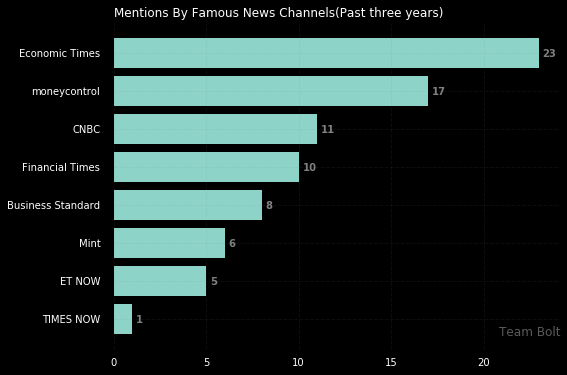

In [5]:
#Plot graph for EY
plt.style.use('dark_background')
name = famous['Channel'] 
Count = famous['noOfMention']
# Figure Size 
fig, ax = plt.subplots(figsize =(8, 6)) 
# Horizontal Bar Plot 
ax.barh(name, Count)   
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False)   
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')   
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)   
# Show top values  
ax.invert_yaxis() 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
  
# Add Plot Title 
ax.set_title('Mentions By Famous News Channels(Past three years)', 
             loc ='left', ) 
  
# Add Text watermark 
fig.text(0.9, 0.15, 'Team Bolt', fontsize = 12, 
         color ='grey', ha ='right', va ='bottom', 
         alpha = 0.7) 
  
plt.savefig('EY_news.png')  
# Show Plot 
plt.show()


In [6]:
#For all big 4
EY=pd.read_csv("FamousNewsChannel/EY_NewsChannel.csv")
pwc=pd.read_csv("FamousNewsChannel/PWC_NewsChannel.csv")
deloitte=pd.read_csv("FamousNewsChannel/Deloitte_NewsChannel.csv")
KPMG=pd.read_csv("FamousNewsChannel/KPMG_NewsChannel.csv")

In [7]:
#Define a function for all the preprocessing
def findcount(df,val):
    famous=df.groupby("UserName").count()
    famous["Channel"]=famous.index
    famous=famous[["Text","Channel"]]
    famous.rename({"Text":val},axis=1,inplace=True)
    famous=famous.sort_values(by=[val],ascending=False)
    return famous

In [8]:
EY=findcount(EY,"EY")
pwc=findcount(pwc,"PWC")
deloitte=findcount(deloitte,"Deloitte")
KPMG=findcount(KPMG,"KPMG")

In [9]:
#Combining Data in a single Dataframe
finaltab=pd.merge(EY, KPMG)
finaltab=pd.merge(finaltab,deloitte)
finaltab=pd.merge(finaltab, pwc)

In [10]:
finaltab

,EY,Channel,KPMG,Deloitte,PWC
0,23,Economic Times,20,23,13
1,17,moneycontrol,6,10,16
2,11,CNBC,8,1,1
3,10,Financial Times,24,14,19
4,8,Business Standard,8,7,12
5,6,Mint,8,7,5
6,5,ET NOW,10,5,11


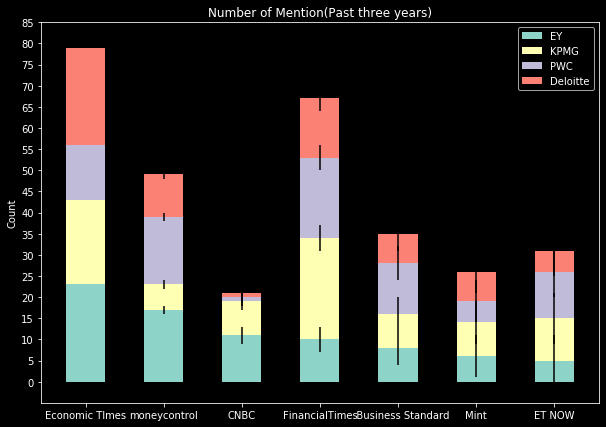

In [11]:
#plot the graph
N=7
EY = finaltab["EY"]
PWC =finaltab["PWC"]
KPMG =finaltab["KPMG"]
Deloitte =finaltab["Deloitte"]

Std = (0,1,2,3,4,5,6) 
bar1 = np.add(EY,KPMG).tolist()
bar2 = np.add(bar1,PWC).tolist()


ind = np.arange(N)    
width = 0.5  
plt.style.use('dark_background')
  
fig = plt.subplots(figsize =(10, 7)) 
p1 = plt.bar(ind, EY, width, yerr = Std) 
p2 = plt.bar(ind, KPMG, width, bottom = EY, yerr = Std)
p3 = plt.bar(ind, PWC, width, bottom = bar1, yerr = Std) 
p4 = plt.bar(ind, Deloitte, width, bottom = bar2, yerr = Std) 

  
plt.ylabel('Count') 
plt.title('Number of Mention(Past three years)') 
plt.xticks(ind, ('Economic TImes', 'moneycontrol', 'CNBC', 'FinancialTimes', '   Business Standard','Mint','ET NOW')) 
plt.yticks(np.arange(0, 90, 5)) 
plt.legend((p1[0], p2[0],p3[0],p4[0]), ('EY', 'KPMG','PWC','Deloitte')) 
plt.savefig('NewsBig4.png')  
plt.show() 

In [12]:
#Key Insights
'''
There were 19 incidents where KPMG was mentioned while the count is 17,14 and 12 for EY,Deloitte and PWC.
Also in the year 2019 KPMG was almost mentioned in every month
Though EY is almost equal to other Big4 but still need to have more incidents in order to dominate in this.
'''

'\nThere were 19 incidents where KPMG was mentioned while the count is 17,14 and 12 for EY,Deloitte and PWC.\nAlso in the year 2019 KPMG was almost mentioned in every month\nThough EY is almost equal to other Big4 but still need to have more incidents in order to dominate in this.\n'